<b style="font-size: 24px;">Hang Seng Index growth and volatility correlation coefficient</b>

Here attempt to compute the correlation coefficient for Hang Seng constituent stocks based on two variables: compounded annual growth rate (CAGR) in share price; and, Annualized volatility (vol) in daily returns of the share prices. 

The approach involved: 
1. calculate the median and standard deviation for both variables (median CAGR for constituent stocks, median vol for constituent stocks, standard deviation of both CAGR and vol);
2. convert all data so each stock's data is represented by its distance in standard deviations from the median;
3. compute the relationship between CAGR and vol across all Hang Seng constituent share prices as measured by standard units.
4. produce a scatter plot that depicts this relationship. And show on the scatter plot the line of best fit for the linear relationship between the two variables.

Daily returns and volatility were computed using yahoo finance collected share prices for the latest (2024-january) Hang Seng constituent components from 2010-01-01 with the output saved in a pickle file. That pickle file data becomes the start point for this analysis. 

Let's begin by loading the packages to use and get today's date.

In [1]:
import warnings

# Ignore the specific FutureWarning
warnings.filterwarnings('ignore', 'The default dtype for empty Series will be', FutureWarning)

import timeit
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

# Get today's date
today = datetime.today().strftime('%Y_%m_%d')

Load in data file that contains CAGR and vol for Hang Seng constituent stocks. 

In [2]:
# Load in pickle file
with open('2024_02_25_hangseng_constituent_symbols.csv_performance.pkl', 'rb') as file:
    data = pickle.load(file)

Create a data frame and provide summary data of the content

In [3]:
# Create a dataframe
df = pd.DataFrame(data, columns=['Symbol', 'CAGR', 'Annualized Volatility'])


In [4]:
print(df.info(), "\n")
print(df.dtypes, "\n")
print(df.head(), "\n")
print(df.tail(), "\n")
print(df.describe(), "\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 32
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 51 non-null     object 
 1   CAGR                   51 non-null     float64
 2   Annualized Volatility  51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB
None 

Symbol                    object
CAGR                     float64
Annualized Volatility    float64
dtype: object 

     Symbol   CAGR  Annualized Volatility
0      ^HSI  -1.86                  20.38
17  0669.HK  21.72                  40.01
28  0027.HK  21.16                  42.89
27  2020.HK  17.74                  44.36
3   0700.HK  17.54                  35.03 

     Symbol   CAGR  Annualized Volatility
33  1113.HK  -4.61                  25.71
35  2628.HK  -6.63                  31.31
2   9988.HK -19.51                  51.18
15  9618.HK -21.89                  58.14


## Calculate the median and standard deviation for both variables

In [5]:
# Step 1: Calculate the median and standard deviation for both variables
median_cagr = df['CAGR'].median()
std_dev_cagr = df['CAGR'].std()
print(f"The median of the variable CAGR is: {median_cagr} and the standard deviation of the variable CAGR is {std_dev_cagr}.\n")



The median of the variable CAGR is: 5.45 and the standard deviation of the variable CAGR is 8.915929423800755.



In [6]:
median_vol = df['Annualized Volatility'].median()
std_dev_vol = df['Annualized Volatility'].std()
print(f"The median of the variable Annualized Volatility of daily returns is: {median_vol} and the standard deviation of Annualized Volatility is {std_dev_vol}.\n")


The median of the variable Annualized Volatility of daily returns is: 34.59 and the standard deviation of Annualized Volatility is 13.082008564376931.



## Represent each stock by its distance in standard deviation from the median for both CAGR and vol

In [7]:
df['CAGR_standard_units'] = (df['CAGR'] - median_cagr) / std_dev_cagr
df['Volatility_standard_units'] = (df['Annualized Volatility'] - median_vol) / std_dev_vol

print(df[['Symbol', 'CAGR', 'Annualized Volatility', 'CAGR_standard_units', 'Volatility_standard_units']].to_string(index=False))

 Symbol   CAGR  Annualized Volatility  CAGR_standard_units  Volatility_standard_units
   ^HSI  -1.86                  20.38            -0.819881                  -1.086225
0669.HK  21.72                  40.01             1.824824                   0.414309
0027.HK  21.16                  42.89             1.762015                   0.634459
2020.HK  17.74                  44.36             1.378432                   0.746827
0700.HK  17.54                  35.03             1.356000                   0.033634
2313.HK  16.72                  38.14             1.264030                   0.271365
2899.HK  10.66                  44.16             0.584347                   0.731539
2269.HK  10.38                  59.40             0.552943                   1.896498
9633.HK  10.24                  36.16             0.537241                   0.120012
0823.HK   9.77                  20.88             0.484526                  -1.048004
1093.HK   9.67                  40.38             0.47

The standard units measurement for the ^HSI can be derived with reference to the previously computed median CAGR of 5.45 with standard deviation of 8.91 and median vol of 34.59 with standard deviation of 13.1. That means that the ^HSI with (CAGR of -1.86 and vol of 20.38) is -0.82  below the median in CAGR (the difference of -1.86 from 5.45 divided by 8.91). And -1.08 standard deviations below the median in vol (the difference of 20.38 and 34.59 divided by 13.1).  

So in the case of the ^HSI it shows that it is below the median in CAGR and below the median in vol. 

## Calculate the relationship between CAGR and volatility across all stocks as measured by standard units 

In [8]:
correlation = df['CAGR_standard_units'].corr(df['Volatility_standard_units'])
print(f"Correlation between CAGR and Volatility: {correlation}")

Correlation between CAGR and Volatility: -0.10405885063050635


## Plot the relationship and line of best fit

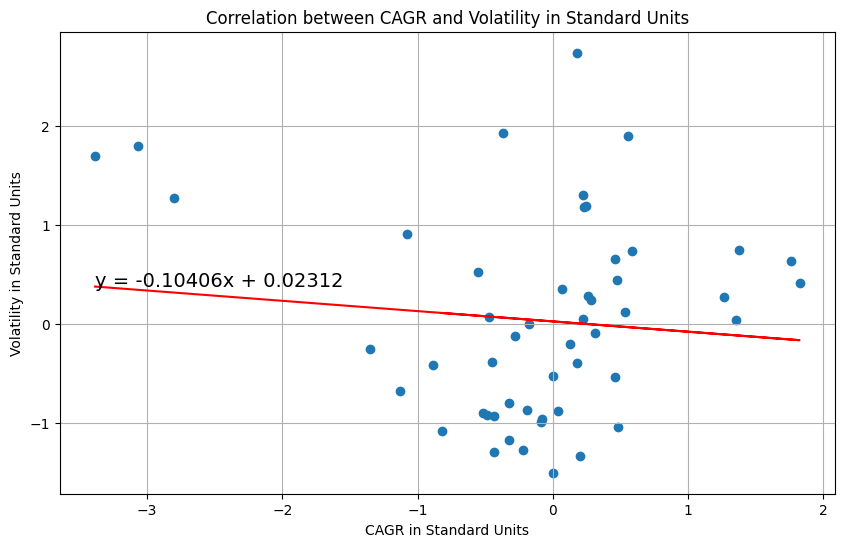

In [9]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['CAGR_standard_units'], df['Volatility_standard_units'])

# Add a line of best fit
m, b = np.polyfit(df['CAGR_standard_units'], df['Volatility_standard_units'], 1)
plt.plot(df['CAGR_standard_units'], m*df['CAGR_standard_units'] + b, color='red')

# Add the equation to the plot
equation = f"y = {m:.5f}x + {b:.5f}"
plt.text(df['CAGR_standard_units'].min(), m*df['CAGR_standard_units'].min() + b, equation, fontsize=14)

plt.title('Correlation between CAGR and Volatility in Standard Units')
plt.xlabel('CAGR in Standard Units')
plt.ylabel('Volatility in Standard Units')
plt.grid(True)
plt.show()

## Conclusion

Because both variables are expressed in standard units the gradient (slope) of the line of best fit is equal to the correlation coefficient which in this case is -0.10. 

Since the coefficient is close to zero it implies there is a weak, negative linear relationship between CAGR and volatility. As CAGR increases or decreases there is not a strong predictable change in volatility.


In [10]:
# Print the equation of the line of best fit
print(f"The equation of the line of best fit is: Volatility in Standard Units = {m:.4f} * CAGR in Standard Units + {b:.4f}")

The equation of the line of best fit is: Volatility in Standard Units = -0.1041 * CAGR in Standard Units + 0.0231
